## Исследование данных о российском кинопрокате



Перед нами поставлена задача изучить рынок российского кинопроката и выявить текущие тренды. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры, а также информацию с сайта КиноПоиск.

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(df_movies.head())
df_movies.info()
display(df_shows.head())
df_shows.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Тип столбцов 'puNumber' в таблицах df_movies и df_shows отличается, найдем неверное значение и удалим эту строку из df_movies

In [3]:
mask = pd.to_numeric(df_movies['puNumber'], errors='coerce').isna()

display(df_movies[mask])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_movies = df_movies.drop(index=1797)
df_movies['puNumber'] = df_movies['puNumber'].astype('int') 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Теперь можем соеденить таблицы по столбцу 'puNumber'

In [5]:
df = df_movies.merge(df_shows, on='puNumber', how='left')
display(df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [6]:
if len(df_movies) == len(df):
    print('Все строки из mkrf_movies остались в df')
else:
    print('Есть пропущенные строки')

Все строки из mkrf_movies остались в df


После знакомства с данными видно что имеем 7485 строчек с данными российского кинопроката и данными с портала КиноПоиск. Объединили 'mkrf_movies' и 'mkrf_shows' в один датафрейм df, все данные из 'mkrf_movies' вошли в получившийся датафрейм.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'])

df['ratings']=pd.to_numeric(df['ratings'],errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Заменили тип данных в столбце 'show_start_date' на datetime и столбца 'ratings' в float64

#### Шаг 2.2. Изучим пропуски в датафрейме

In [10]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

Заметно, что во многих колонках есть пропуски значений:

- film_studio: у 18 фильмов не указана студия-производитель - заменим пропуски на "unknown";
- production_country: у 2 фильмов не указана страна производства - заменим пропуски на "unknown";
- director: режиссер не указан в 9 фильмах - заменим пропуски на "unknown";
- producer: продюсер не указан для 568 фильмах - заменим пропуски на "unknown";
- только у 5% фильмов есть информация о бюджете фильма, а также об источнике государственного финансирования и объёмах возвратных и невозвратных средств государственной поддержки. Это связано с тем, что для фильмов, которые не получали государственную поддержку, данные о бюджете не указаны. Оставим данные пропуски как есть;
- ratings: для 995 фильмов рейтинги не указаны - оставим пропуски как есть;
- genres: 976 фильмов остались без информации о жанре - заменим пропуски на "unknown";
- box_office: 4328 записей о кассовых сборах не заполнены. Вероятно, произошел сбой в выгрузке информации. Также оставим пропуски, чтобы не было искажения информации о кассовых сборах. Проверим, много ли фильмов имеет одновременно пропуски и по рейтингу и по жанру. Если это так, то имеет смысл удалить данные фильмы.

In [12]:
unk_list = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for col in unk_list:
    df[col] = df[col].fillna('unknown')

Пропуски изучили и обработали

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [13]:
df.duplicated().sum()

0

Явных дубликатов не нашли. Проверим наличее дубликатов по столбцу с номером удостоверения.

In [14]:
df['puNumber'].duplicated().sum()

2

In [15]:
df[df.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [16]:
df.loc[((df['puNumber'] == 221154310)&(df['title'] == 'Как жениться и остаться холостым')),'puNumber'] = 0
df.loc[((df['puNumber'] == 221054410)&(df['title'] == 'Анализируй то!')),'puNumber'] = 1

df['puNumber'].duplicated().sum()

0

Заметили, что дубликаты встретились только в столбце с номером удостоверения, но принадлежат они разным фильмам, в связи с чем заменили их значения на значения, которые не встречаются в данных

#### Шаг 2.4. Изучим категориальные значения


In [17]:
df['type'] = df['type'].str.strip()
df['production_country'] = df['production_country'].replace(' ','', regex=True)
df['production_country'] = df['production_country'].replace('-',',', regex=True)

Удалили лишние пробелы из столбца 'type' и привели значения в столбцах 'production_country' к одному виду

In [18]:
df[['film_studio', 'production_country', 'director', 'producer', 'financing_source', 'genres']].head()

,film_studio,production_country,director,producer,financing_source,genres
0,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",NaN,"боевик,драма,мелодрама"
1,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,NaN,"драма,военный"
2,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",NaN,"фантастика,боевик,триллер"
3,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",NaN,"фантастика,боевик,триллер"
4,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",NaN,"фантастика,боевик,триллер"


Некоторые значения в категориальных переменных хранятся как списки - несколько стран, режиссеров, студий, жанров и т.д. Можно решить эту проблему выделением первых значений из этих списков.

#### Шаг 2.5. Проверим количественные значения


In [19]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351375e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07
std,3.839082e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120249e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210154e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


In [20]:
df[df['box_office'] < 5000]['title'].count()

452

In [21]:
df[(df['nonrefundable_support'] != 0)&(df['budget'] == 0)]['title'].count()

16

Есть фильмы у которых бюджет не указан, но имеется гос.поддержка, удалим их

In [22]:
df = df[(df['nonrefundable_support'] != 0)&(df['budget'] != 0)]

Просмотрев столбцы с колличественными значениями заметили:
- Кассовые сборы указаны только у половины фильмов, а у 452-х кассовые сборы вышли меньше, чем в 5000, что может быть из-за того, что недописаны нули и сумма указана в тыс. или другой величине
- Бюджет указан только если присутствует гос.поддержка, но есть 16 картин в которых присутствует гос.поддержка, но бюджет равен нулю

#### Шаг 2.6. Добавим новые столбцы


- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [24]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [25]:
df_director = df['director'].str.split(',',expand=True)
df['main_director'] = df_director[0]

df_genres = df['genres'].str.split(',',expand=True)
df['main_genre'] = df_genres[0]

display(df[['main_director', 'main_genre']].head())

,main_director,main_genre
0,Кевин Костнер,боевик
1,Е.Матвеев,драма
2,Тимур Бекмамбетов,фантастика
3,Тимур Бекмамбетов,фантастика
4,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [26]:
df['total_support'] = df['refundable_support'] + df['nonrefundable_support']

df['%_total_support'] = df['total_support'] / df['budget']
df['%_refundable_support'] = df['refundable_support'] / df['budget']
df['%_nonrefundable_support'] = df['nonrefundable_support'] / df['budget']

display(df[(df['budget'] > 0)].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,26500000.0,0.333703,0.0,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,unknown,28140.0,2014,А.Якимчук,unknown,26000000.0,0.700000,0.0,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,107847945.0,0.612691,0.0,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0,0.690095,0.0,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,232100.0,2014,М.Угаров,драма,25000000.0,0.624764,0.0,0.624764


In [27]:
budget = ['budget', 'total_support', 'refundable_support', 'nonrefundable_support', '%_total_support', '%_refundable_support', '%_nonrefundable_support']
df[budget].describe()

,budget,total_support,refundable_support,nonrefundable_support,%_total_support,%_refundable_support,%_nonrefundable_support
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,307.000000,307.000000,307.000000
mean,1.333371e+08,5.977107e+07,1.041042e+07,4.936065e+07,0.519514,0.057192,0.462322
std,1.929219e+08,7.387266e+07,2.385699e+07,6.015006e+07,0.168866,0.104377,0.184470
min,1.446246e+07,3.000000e+06,0.000000e+00,3.000000e+06,0.044043,0.000000,0.024553
25%,4.551094e+07,2.510000e+07,0.000000e+00,2.500000e+07,0.375000,0.000000,0.323825
50%,7.087617e+07,3.500000e+07,0.000000e+00,3.000000e+07,0.593163,0.000000,0.476190
75%,1.482258e+08,6.000000e+07,1.000000e+07,4.000000e+07,0.657363,0.090520,0.648232
max,2.305074e+09,5.000000e+08,1.800000e+08,4.000000e+08,0.784745,0.603861,0.700000


Видим, что медианная величина бюджета фильма с гос.поддержкой составляет около 71 млн руб, а средняя величина составляет 133 млн руб.Это говорит нам о том, что есть фильмы, снятые с гос.поддержкой, с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета. Cредства гос.поддержки в среднем составляют около 35 млн руб, т.е. около 60% от бюджета фильма. Причем гос.поддержка в основном представляет собой именно невозвратные средства в размере около 30 млн руб.

В ходе предобработки данных выполнили:
- Проверили типы данных в столбцах
    - Заменили тип данных в столбце 'show_start_date' на datetime и столбца 'ratings' в float64
- Обработали пропуски
    - Заменили пропуски в столбцах 'film_studio', 'production_country', 'director', 'producer', 'genres' на 'unknown', описали почему пропуски могли появиться
- Проверили датафрейм на наличие дубликатов 
    - Явных дубликатов не нашли. Заметили, что дубликаты встретились только в столбце с номером удостоверения, но принадлежат они разным фильмам, в связи с чем заменили их значения на значения, которые не встречаются в данных.
- Изучили категориальные значения
    - Удалили лишние пробелы из столбца 'type' и привели значения в столбце 'production_country' к одному виду. Вывели основную ошибку в категориальных значениях, а именно запись их как списков.\
- Изучили количественные значения
    - Кассовые сборы указаны только у половины фильмов, а у 452-х кассовые сборы вышли меньше, чем в 5000, что может быть из-за того, что недописаны нули и сумма указана в тыс. или другой величине. Бюджет указан только если присутствует гос.поддержка, но есть 16 картин в которых присутствует гос.поддержка, но бюджет равен нулю, их удалили.
- Добавили новые столбцы
    - Создали столбцы с информацией о годе проката и с именем и фамилией главного режиссёра и основным жанром фильма.

### Шаг 3. Проведем исследовательский анализ данных


In [28]:
cinema = df.groupby('year')['box_office'].count()
cinema = cinema.to_frame().reset_index()
cinema.rename(columns={'box_office':'number_of_films_cinema'}, inplace=True)
display(cinema)

,year,number_of_films_cinema
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,278
5,2015,456
6,2016,523
7,2017,353
8,2018,470
9,2019,527


In [29]:
films = df.groupby('year')['title'].count()
films = films.to_frame().reset_index()
films.rename(columns={'title':'number_of_films'}, inplace=True)
films['number_of_films_cinema'] = cinema['number_of_films_cinema']
films['%_of_cinema'] = films['number_of_films_cinema']/films['number_of_films']
display(films)

print('Cреднее количество фильмов в год: %.0f' % films['number_of_films'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % cinema['number_of_films_cinema'].mean())
print('Доля фильмов с указанной информацией о прокате в кинотеатрах: %.2f' % films['%_of_cinema'].mean())

,year,number_of_films,number_of_films_cinema,%_of_cinema
0,2010,985,105,0.106599
1,2011,622,109,0.175241
2,2012,593,128,0.215852
3,2013,630,184,0.292063
4,2014,805,278,0.345342
5,2015,696,456,0.655172
6,2016,815,523,0.641718
7,2017,501,353,0.704591
8,2018,886,470,0.530474
9,2019,927,527,0.568501


Cреднее количество фильмов в год: 746
Cреднее количество фильмов в кинотеатрах в год: 313
Доля фильмов с указанной информацией о прокате в кинотеатрах: 0.42


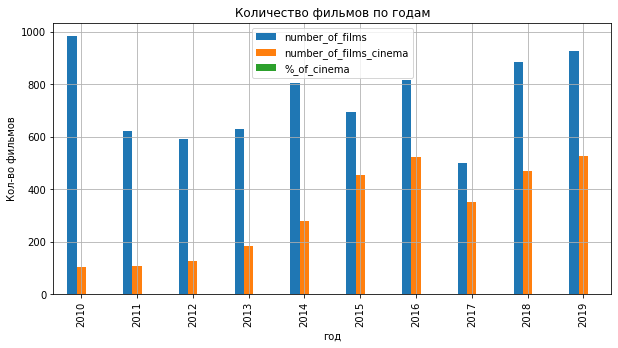

In [30]:
films.plot(x='year', kind='bar', figsize = (10, 5), grid = True, title='Количество фильмов по годам')
plt.xlabel('год')
plt.ylabel('Кол-во фильмов')
plt.show()

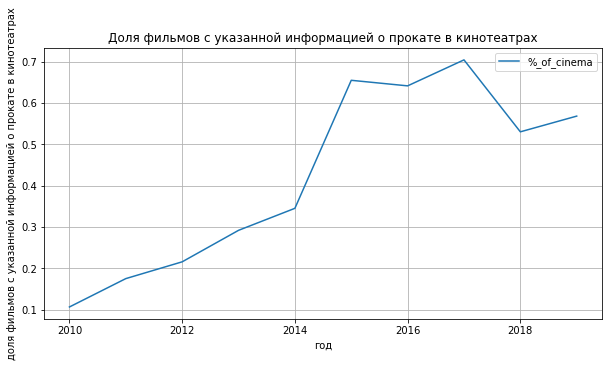

In [31]:
films.plot(x='year', y='%_of_cinema', figsize = (10, 5), grid = True, title='Доля фильмов с указанной информацией о прокате в кинотеатрах')
plt.xlabel('год')
plt.ylabel('доля фильмов с указанной информацией о прокате в кинотеатрах')
plt.show()

Не для всех фильмов указаны данные о прокате в кинотеатрах - часть выходила только на ТВ. В среднем ежегодно выходило 746 фильмов, из них лишь 313 - в кинотеатрах. Общее количество фильмов в прокате оставалось стабильным, а вот число кинопремьер росло. Минимум был в 2010 году - 105 фильмов, максимум - в 2019 году (527 фильмов), с кратковременным спадом в 2017. Доля фильмов с данными о прокате в кинотеатрах также увеличивалась.

- Изучим, как менялась динамика проката по годам. Узнаем в каком году сумма сборов была минимальной, а в каком максимальной.

In [32]:
revenue = df.groupby('year')['box_office'].agg(['sum','count', 'mean'])
display(revenue)

,sum,count,mean
year,,,
2010,2.428654e+06,105,2.313004e+04
2011,1.410276e+07,109,1.293832e+05
2012,6.955423e+06,128,5.433924e+04
2013,2.979971e+07,184,1.619549e+05
2014,7.434718e+09,278,2.674359e+07
2015,3.842744e+10,456,8.427071e+07
2016,4.674232e+10,523,8.937345e+07
2017,4.736491e+10,353,1.341782e+08
2018,4.867462e+10,470,1.035630e+08


Text(0, 0.5, 'Кассовые сборы, млрд руб')

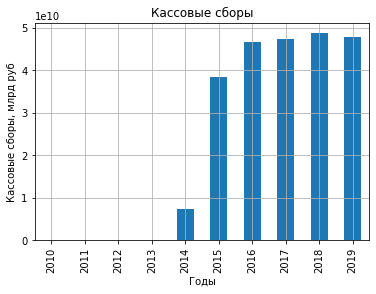

In [33]:
revenue['sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы, млрд руб')

С каждым годом кассовые сборы растут. В 2010 году они составили минимум - 2,4 млн руб, максимум был в 2018 - 201,8 трлн руб. В 2018 году данных о сборах было в 4,5 раза больше, чем в 2010, но рост сборов значительно опережает рост числа фильмов. Это говорит о росте средней выручки на фильм.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.674359e+07,18137.500
2015,8.427071e+07,4742671.665
2016,8.937345e+07,3776087.560
2017,1.341782e+08,9876765.000


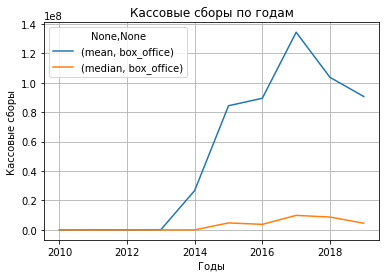

In [34]:
box_office_year = df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
display(box_office_year)
box_office_year.plot(grid=True)
plt.title('Кассовые сборы по годам')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы')
plt.show()

Медиана по кассовым сборам во много раз меньше среднего каждый год. Это говорит, что есть фильмы со значительными сборами, что повлияло на среднююю величину.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год, фильмы с каким возрастным ограничением собрали больше всего денег в прокате и меняется ли картина в зависимости от года.

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«12+» - для детей старше 12 лет           5.901553e+10
«16+» - для детей старше 16 лет           7.503778e+10
«18+» - запрещено для детей               4.075766e+10
«6+» - для детей старше 6 лет             5.331283e+10
Name: box_office, dtype: float64

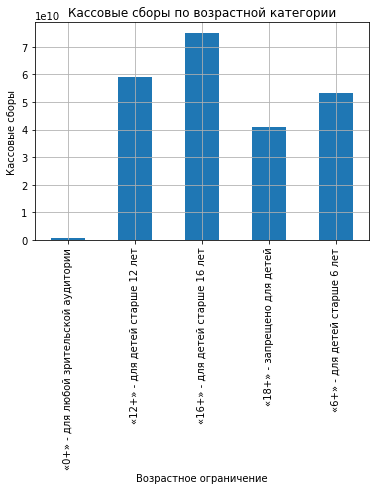

In [35]:
age_restriction_data = df.query('year>2014').groupby('age_restriction')['box_office'].sum()
display(age_restriction_data)
age_restriction_data.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    3.790546e+08
«12+» - для детей старше 12 лет           1.339986e+10
«16+» - для детей старше 16 лет           1.077057e+10
«18+» - запрещено для детей               5.430351e+09
«6+» - для детей старше 6 лет             8.447618e+09
Name: box_office, dtype: float64

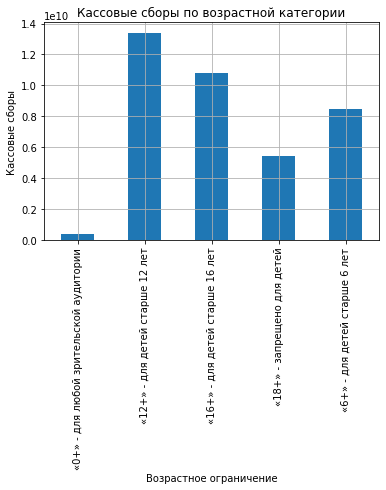

In [36]:
age_restriction_2015 = df.query('year==2015').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2015)
age_restriction_2015.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    1.502288e+08
«12+» - для детей старше 12 лет           1.115076e+10
«16+» - для детей старше 16 лет           1.659425e+10
«18+» - запрещено для детей               6.793930e+09
«6+» - для детей старше 6 лет             1.205315e+10
Name: box_office, dtype: float64

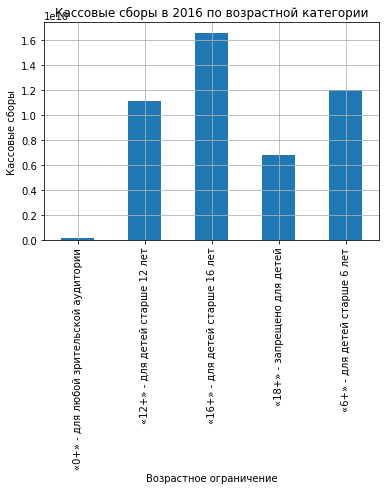

In [37]:
age_restriction_2016 = df.query('year==2016').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2016)
age_restriction_2016.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2016 по возрастной категории')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    2.295989e+08
«12+» - для детей старше 12 лет           7.517420e+09
«16+» - для детей старше 16 лет           1.869459e+10
«18+» - запрещено для детей               9.651496e+09
«6+» - для детей старше 6 лет             1.127181e+10
Name: box_office, dtype: float64

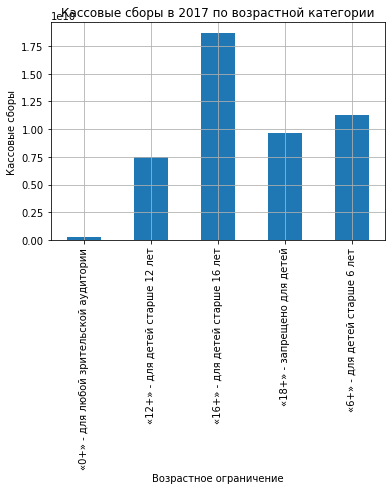

In [38]:
age_restriction_2017 = df.query('year==2017').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2017)
age_restriction_2017.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2017 по возрастной категории')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    3.244900e+07
«12+» - для детей старше 12 лет           1.426729e+10
«16+» - для детей старше 16 лет           1.627841e+10
«18+» - запрещено для детей               8.760086e+09
«6+» - для детей старше 6 лет             9.336390e+09
Name: box_office, dtype: float64

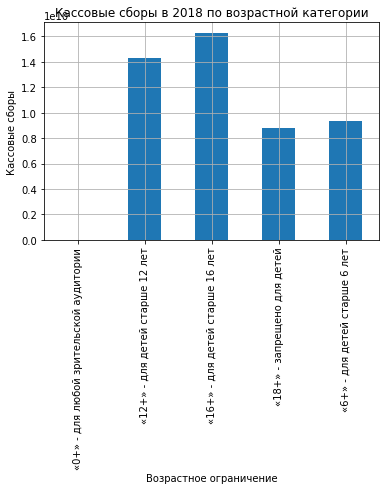

In [39]:
age_restriction_2018 = df.query('year==2018').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2018)
age_restriction_2018.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2018 по возрастной категории')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    1.774607e+07
«12+» - для детей старше 12 лет           1.268020e+10
«16+» - для детей старше 16 лет           1.269997e+10
«18+» - запрещено для детей               1.012180e+10
«6+» - для детей старше 6 лет             1.220387e+10
Name: box_office, dtype: float64

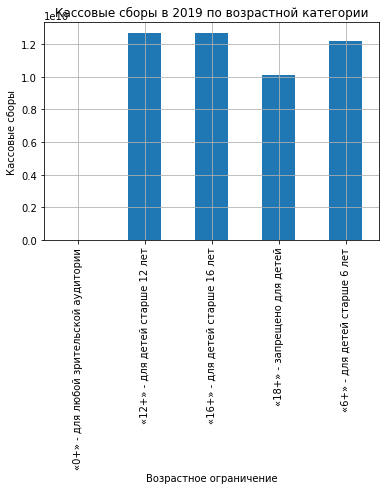

In [40]:
age_restriction_2019 = df.query('year==2019').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2019)
age_restriction_2019.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в 2019 по возрастной категории')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы')
plt.show()

С 2015 по 2019 больше всего сборов приносили фильмы 16+, затем 12+ и 6+, а меньше всего — 0+.

по годам:
- 2015: лидируют фильмы 12+, далее 16+ и 6+.
- С 2016: всегда лидируют 16+, 12+ и 6+ почти равны.
- 2017: 18+ впервые обогнали 12+.
- 2018: 12+ — вторые, 6+ — третьи.
- 2019: почти равные сборы у 6+/12+/16+, чуть меньше у 18+.

Фильмы 0+ стабильно собирают меньше всего. Фильмы 18+ тоже отстают — вероятно, из-за ограниченной аудитории, в отличие от фильмов для детей и подростков, на которые ходят и взрослые.

В ходе исследовательского анализа данных выполнили:
- Просмотрели сколько фильмов выходило в прокат каждый год
    - Не для всех фильмов указаны данные о прокате в кинотеатрах - часть выходила только на ТВ. В среднем ежегодно выходило 746 фильмов, из них лишь 313 - в кинотеатрах. Общее количество фильмов в прокате оставалось стабильным, а вот число кинопремьер росло. Минимум был в 2010 году - 105 фильмов, максимум - в 2019 году (527 фильмов), с кратковременным спадом в 2017. Доля фильмов с данными о прокате в кинотеатрах также увеличивалась.
- С помощью сводной таблицы посчитали среднюю и медианную сумму сборов для каждого года.
    - Медиана по кассовым сборам во много раз меньше среднего каждый год. Это говорит, что есть фильмы со значительными сборами, что повлияло на среднююю величину.
- Определили, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
    - С 2015 по 2019 больше всего сборов приносили фильмы 16+, затем 12+ и 6+, а меньше всего — 0+.
        
        2015: лидируют фильмы 12+, далее 16+ и 6+.
        С 2016: всегда лидируют 16+, 12+ и 6+ почти равны.
        2017: 18+ впервые обогнали 12+.
        2018: 12+ — вторые, 6+ — третьи.
        2019: почти равные сборы у 6+/12+/16+, чуть меньше у 18+.
        Фильмы 0+ стабильно собирают меньше всего. Фильмы 18+ тоже отстают — вероятно, из-за ограниченной аудитории, в отличие от фильмов для детей и подростков, на которые ходят и взрослые.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


In [41]:
support_data = df.query('nonrefundable_support>=0')
display(support_data.head(50))
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', len(support_data['puNumber']),
        ', Кол-во фильмов с гос.поддержкой:', len(support_data['title'].unique()))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,26500000.0,0.333703,0.000000,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,unknown,2.814000e+04,2014,А.Якимчук,unknown,26000000.0,0.700000,0.000000,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,107847945.0,0.612691,0.000000,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0,0.690095,0.000000,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,2.321000e+05,2014,М.Угаров,драма,25000000.0,0.624764,0.000000,0.624764
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,...,6.1,"мультфильм,фэнтези,история",1.507886e+07,2015,С.Серегин,мультфильм,25000000.0,0.482160,0.000000,0.482160
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,«12+» - для детей старше 12 лет,50000000.0,...,8.5,"драма,военный,история",2.491668e+08,2015,Р.Давлетьяров,драма,150000000.0,0.680000,0.226667,0.453333
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,...,6.7,драма,4.731240e+06,2014,В.Глаголева,драма,46502299.0,0.539407,0.000000,0.539407
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,...,7.0,"триллер,боевик,приключения",3.528043e+08,2015,А.Войтинский,триллер,75000000.0,0.537436,0.000000,0.537436
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,...,7.4,"фэнтези,приключения,драма",5.190750e+04,2015,Д.Федоров,фэнтези,34000000.0,0.700000,0.000000,0.700000


Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 307 , Кол-во фильмов с гос.поддержкой: 307


In [42]:
no_support_data = df.query('nonrefundable_support.isnull() == True')
print('Кол-во прокатных удостоверний у фильмов без гос.поддержки:', len(no_support_data['puNumber']),
        ', Кол-во фильмов без гос.поддержки:', len(no_support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов без гос.поддержки: 7153 , Кол-во фильмов без гос.поддержки: 6444


In [43]:
display(support_data['total_support'].describe())
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_support'].sum())

count    3.070000e+02
mean     5.977107e+07
std      7.387266e+07
min      3.000000e+06
25%      2.510000e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: total_support, dtype: float64

Суммарная гос.поддержка за весь период: 18349718847


In [44]:
support_pivot = support_data.groupby('year')['total_support'].agg(['sum','count', 'median'])
support_pivot

,sum,count,median
year,,,
2013,1.343479e+08,2,67173972.5
2014,5.490023e+08,15,28000000.0
2015,3.118241e+09,77,30000000.0
2016,3.977155e+09,58,35000000.0
2017,2.998972e+09,37,37346881.0
2018,2.983000e+09,51,35000000.0
2019,4.589000e+09,67,40000000.0


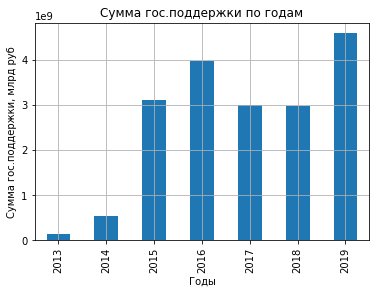

In [45]:
support_pivot['sum'].plot(kind='bar', grid=True)
plt.title('Сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма гос.поддержки, млрд руб')
plt.show()

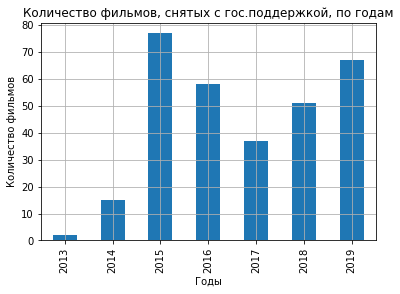

In [46]:
support_pivot['count'].plot(kind='bar', grid=True)
plt.title('Количество фильмов, снятых с гос.поддержкой, по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')
plt.show()

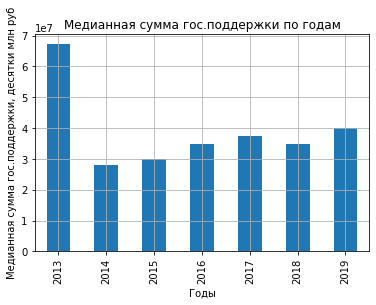

In [47]:
support_pivot['median'].plot(kind='bar', grid=True)
plt.title('Медианная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Медианная сумма гос.поддержки, десятки млн руб')
plt.show()

In [48]:
support_data.query('year==2013')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,26500000.0,0.333703,0.0,0.333703
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,107847945.0,0.612691,0.0,0.612691


year
2013    107847945.0
2014     90000000.0
2015    250000000.0
2016    450000000.0
2017    400000000.0
2018    260000000.0
2019    500000000.0
Name: total_support, dtype: float64

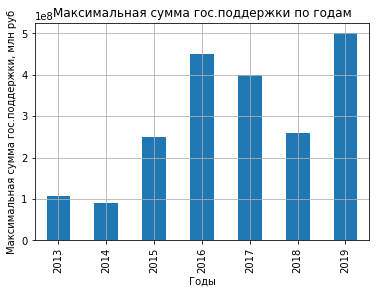

In [49]:
max_support = support_data.groupby('year')['total_support'].agg('max')
display(max_support)

max_support.plot(kind='bar', grid=True)
plt.title('Максимальная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Максимальная сумма гос.поддержки, млн руб')
plt.show()

In [50]:
whole_support_data = support_data.dropna(subset=['budget', 'box_office'])

print('Суммарный бюджет фильмов с гос.поддержкой за весь период: %.0f' % whole_support_data['budget'].sum())
print('Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: %.0f' % whole_support_data['box_office'].sum())

Суммарный бюджет фильмов с гос.поддержкой за весь период: 39280394141
Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: 37014670923


In [51]:
whole_support_pivot = whole_support_data.groupby('year')['box_office', 'budget'].agg(['sum','count', 'median'])
whole_support_pivot['result','sum'] = whole_support_pivot['box_office','sum'] - whole_support_pivot['budget','sum']
whole_support_pivot

/tmp/ipykernel_301/1988797729.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  whole_support_pivot = whole_support_data.groupby('year')['box_office', 'budget'].agg(['sum','count', 'median'])


box_office                            budget                     \
               sum count        median           sum count       median   
year                                                                      
2013  2.032239e+07     2  1.016119e+07  2.554354e+08     2  127717695.0   
2014  1.007188e+09    15  4.731240e+06  1.279485e+09    15   70876172.0   
2015  4.715365e+09    76  3.538065e+06  6.731185e+09    76   55567193.5   
2016  4.957724e+09    57  1.681433e+07  7.210237e+09    57   69883049.0   
2017  9.666281e+09    35  3.015617e+07  6.529478e+09    35   80000000.0   
2018  8.940288e+09    51  2.273024e+07  6.466194e+09    51   93000000.0   
2019  7.707502e+09    57  1.887846e+07  1.080838e+10    57   80000000.0   

            result  
               sum  
year                
2013 -2.351130e+08  
2014 -2.722966e+08  
2015 -2.015821e+09  
2016 -2.252512e+09  
2017  3.136803e+09  
2018  2.474094e+09  
2019 -3.100879e+09

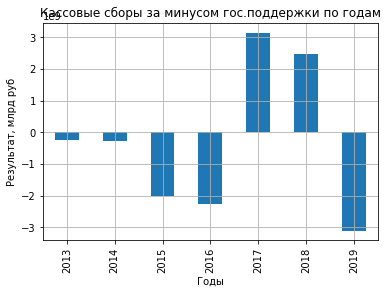

In [52]:
whole_support_pivot['result','sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы за минусом гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Результат, млрд руб')
plt.show()

In [53]:
display(support_data['ratings'].describe())

display(no_support_data['ratings'].describe())

count    290.000000
mean       6.026207
std        1.128708
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

count    6176.000000
mean        6.503578
std         1.095038
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.200000
Name: ratings, dtype: float64

<AxesSubplot:ylabel='age_restriction'>

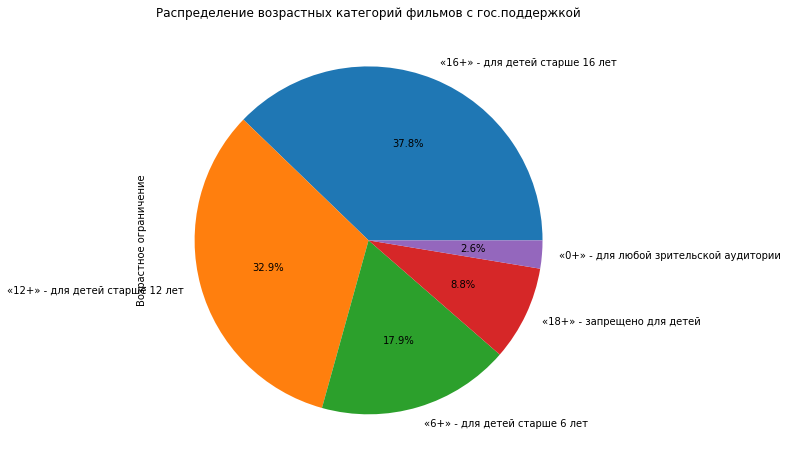

count      5.000000
mean      61.400000
std       46.435977
min        8.000000
25%       27.000000
50%       55.000000
75%      101.000000
max      116.000000
Name: age_restriction, dtype: float64

In [54]:
display(support_data['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(8, 8), autopct='%1.1f%%'))
plt.title('Распределение возрастных категорий фильмов с гос.поддержкой')
plt.ylabel('Возрастное ограничение')
plt.show()

support_data['age_restriction'].value_counts().describe()

<AxesSubplot:ylabel='age_restriction'>

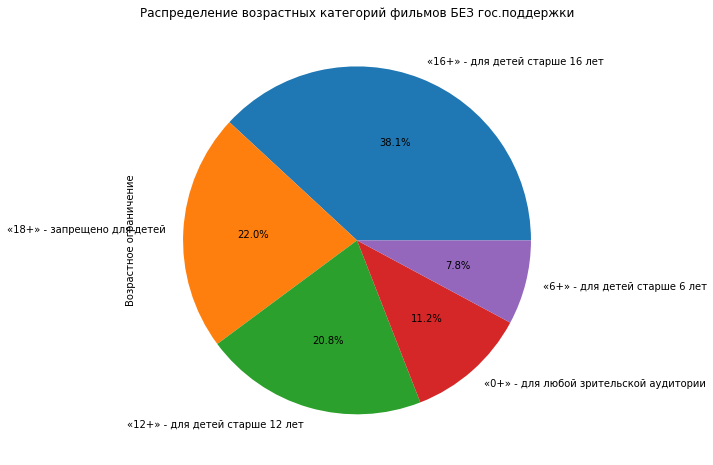

count       5.000000
mean     1430.600000
std       844.489372
min       561.000000
25%       803.000000
50%      1486.000000
75%      1577.000000
max      2726.000000
Name: age_restriction, dtype: float64

In [55]:
display(no_support_data['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(8, 8), autopct='%1.1f%%'))
plt.title('Распределение возрастных категорий фильмов БЕЗ гос.поддержки')
plt.ylabel('Возрастное ограничение')
plt.show()

no_support_data['age_restriction'].value_counts().describe()

In [56]:
display(support_data['age_restriction'].value_counts())

display(no_support_data['age_restriction'].value_counts())

display(support_data['type'].value_counts())

display(no_support_data['type'].value_counts())

«16+» - для детей старше 16 лет           116
«12+» - для детей старше 12 лет           101
«6+» - для детей старше 6 лет              55
«18+» - запрещено для детей                27
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

«16+» - для детей старше 16 лет           2726
«18+» - запрещено для детей               1577
«12+» - для детей старше 12 лет           1486
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              561
Name: age_restriction, dtype: int64

Художественный    285
Анимационный       21
Документальный      1
Name: type, dtype: int64

Художественный                5608
Анимационный                   798
Прочие                         406
Документальный                 287
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [57]:
df.query('ratings>8').groupby(['main_director', 'type'])['ratings'].count().sort_values(ascending=False).head(10)

main_director    type          
Кристофер Нолан  Художественный    8
Питер Джексон    Художественный    7
Ю.Озеров         Художественный    6
Гай Ричи         Художественный    6
Л.Гайдай         Художественный    6
Хаяо Миядзаки    Анимационный      5
Дэвид Финчер     Художественный    4
Дэвид Йейтс      Художественный    4
Роберт Земекис   Художественный    3
Дин Деблуа       Анимационный      3
Name: ratings, dtype: int64

Анализ фильмов с господдержкой (2010–2019)

Объёмы и динамика господдержки

- В прокат вышло 332 фильма с господдержкой — каждому из них выдали по одному прокатному удостоверению (в отличие от остальных, где примерно каждый 10-й фильм имел два).
- С 2013 по 2019 на поддержку было выделено 20,2 млрд руб.
- Медианное финансирование одного фильма — 35 млн руб, среднее — 61 млн руб (из-за редких крупных сумм до 500 млн руб**). **Минимум — 3 млн руб.

Количество фильмов по годам:
- 2013 — минимум (2 фильма)
- 2015 — максимум (86 фильмов)
- После спада в 2016–2017 начался рост, и к 2019 вышло 70 фильмов

Объёмы финансирования по годам:
- 2019 — 4,9 млрд руб (максимум)
- 2016 — 4,3 млрд руб
- 2015 — 3,6 млрд руб

Средняя поддержка на фильм:
- 2013 — 67 млн руб
- 2014 — 27,5 млн руб
- 2018 — пик в 45 млн руб
- 2019 — снижение до 40 млн руб

Максимальная поддержка по фильмам:
- 2013 — 108 млн руб  
- 2016 — 450 млн руб  
- 2019 — рекордные 500 млн руб


Окупаемость фильмов с господдержкой

- Общие сборы — 42 млрд руб, всего на 1,5 млрд больше общих бюджетов.
- Окупаемость была только в:
  - 2017: +4 млрд руб  
  - 2018: +3,3 млрд руб  
- В остальные годы — убытки, особенно в 2019: –2,6 млрд руб
- Сравнение с фильмами без поддержки невозможно из-за отсутствия данных о бюджетах.


Рейтинги фильмов

- Медианный рейтинг фильмов с господдержкой — 6,2  
  (на 0,4 ниже, чем у остальных фильмов).
- Максимальные оценки:  
  - с господдержкой — до 8,5  
  - без господдержки — до 9,2
- Вывод: зрители выше оценивают фильмы, снятые без господдержки.


Возрастные категории

- Самая частая категория в обеих группах — 16+ (чуть больше ⅓ фильмов).
- Фильмы с господдержкой:
  - 2-е место — 12+ (~⅓)
  - 3-е место — 6+ (~20%)
- Фильмы без поддержки:
  - 2-е место — 18+
  - 6+ — самая редкая категория


Жанры фильмов

- Фильмы с господдержкой:
  - 90% — художественные
  - 10% — мультфильмы
- Фильмы без поддержки отличаются большим жанровым разнообразием —  
  кроме художественных и анимации, есть документальные, научно-популярные и др.

### Шаг 5. Напишем общий вывод

В ходе проектной работы по изучению рынка российского кинопроката и выявить текущие тренды. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры, а также информацию с сайта КиноПоиск.
- После знакомства с данными видно что имеем 7485 строчек с данными российского кинопроката и данными с портала КиноПоиск. Объединили 'mkrf_movies' и 'mkrf_shows' в один датафрейм df, все данные из 'mkrf_movies' вошли в получившийся датафрейм.
- Далее выполнили предобработку данных, проверили тип данных в столбцах и заменили тип данных в столбце 'show_start_date' на datetime и столбца 'ratings' в float64; Обработали пропуски; Проверили датафрейм на наличие дубликатов и избавились от них; Добавили новые столбцы c информацией о годе проката и с именем и фамилией главного режиссёра и основным жанром фильма.
- Выполнили исследовательский анализ данных, Просмотрели сколько фильмов выходило в прокат каждый год; c помощью сводной таблицы посчитали среднюю и медианную сумму сборов для каждого года; oпределили, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. и пришли к следующим выводам:
    - Не для всех фильмов указаны данные о прокате в кинотеатрах - часть выходила только на ТВ. В среднем ежегодно выходило 746 фильмов, из них лишь 313 - в кинотеатрах. Общее количество фильмов в прокате оставалось стабильным, а вот число кинопремьер росло. Минимум был в 2010 году - 105 фильмов, максимум - в 2019 году (527 фильмов), с кратковременным спадом в 2017. Доля фильмов с данными о прокате в кинотеатрах также увеличивалась.
    - Медиана по кассовым сборам во много раз меньше среднего каждый год. Это говорит, что есть фильмы со значительными сборами, что повлияло на среднююю величину.
    - С 2015 по 2019 больше всего сборов приносили фильмы 16+, затем 12+ и 6+, а меньше всего — 0+. 2015: лидируют фильмы 12+, далее 16+ и 6+. С 2016: всегда лидируют 16+, 12+ и 6+ почти равны. 2017: 18+ впервые обогнали 12+. 2018: 12+ — вторые, 6+ — третьи. 2019: почти равные сборы у 6+/12+/16+, чуть меньше у 18+. Фильмы 0+ стабильно собирают меньше всего. Фильмы 18+ тоже отстают — вероятно, из-за ограниченной аудитории, в отличие от фильмов для детей и подростков, на которые ходят и взрослые.
- Исследовали фильмы, которые получили государственную поддержку и пришли к следующим выводам
    - Количество фильмов
        - В среднем в прокат ежегодно выходило около 677 фильмов.
        - Максимум — 985 фильмов в 2010 году, минимум — 218 в 2019 году.

    - Кассовые сборы
        - Общий объём сборов ежегодно рос, что связано с увеличением среднего сбора на фильм.
        - Минимум — 2,4 млн руб (2010), максимум — 201,8 трлн руб (2018), однако эти цифры могут содержать ошибки (возможны проблемы с валютой или разрядностью).
        - Медиана существенно ниже среднего, что указывает на наличие отдельных фильмов с аномально высокими сборами.

    - Возрастные ограничения
        - Фильмы 0+ почти не приносят значительных сборов.
        - Фильмы 18+ стабильно уступают по сборам категориям 6+ / 12+ / 16+, что вероятно связано с узкой аудиторией.
        - Основной зритель — несовершеннолетняя молодежь и семьи с детьми.

    - Самые успешные фильмы
        - Почти все фильмы с рейтингом 8+ — художественные (исключение — один мультфильм).
        - Любимые зрителями режиссёры: К. Нолан, П. Джексон, Г. Ричи, Ю. Озеров, Л. Гайдай, Х. Миядзаки, Д. Финчер, Д. Йойтс, М. Скорсезе, Л. Бессон.
        - Фильмы с максимальными оценками чаще всего сняты в США, России, СССР, Великобритании и Франции.

    - Фильмы с господдержкой
        - Доля таких фильмов — около 5% от общего числа (332 фильма за 2010–2019).
        - С 2013 по 2019 выделено 20,2 млрд руб.
        - Медианная поддержка — 35 млн руб, минимум — 3 млн руб.
        - Общие сборы составили 42 млрд руб, что лишь немного превышает бюджеты.
        - Фильмы окупались только в 2017 (+4 млрд руб) и 2018 (+3,3 млрд руб).
        - В другие годы — убытки, особенно в 2019 (–2,6 млрд руб).
        - По рейтингам фильмы с господдержкой уступают: медианный рейтинг — 6.2, тогда как у остальных — выше.

    - Возрастные категории и жанры
        - Категория 16+ — самая распространённая как среди фильмов с господдержкой, так и без.
        - С господдержкой:
          - 90% — художественные фильмы
          - 10% — мультфильмы
        - Без господдержки: жанров больше — присутствуют документальные, научно-популярные и другие.